# Part I -  GoBike System Dataset Exploration 
## by SAUD ALSHUSHAN

## Introduction
> Data set talks about bike system that has the goal of renting bikes with feature of shareing trip with other users


## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#Loading the dataset
df=pd.read_csv("201902-fordgobike-tripdata.csv")
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [4]:
#Display information regarding the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
missing_or_empty_values = df.apply(lambda x: x.isna() | (x == 0))

# Print the number of missing or empty values for each column
missing_or_empty_values.sum()


duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### What is the structure of your dataset?

> * Dataset has 183412 rows × 16 columns

> * The dataset contains a variety of variable types, including int64, object and float64

> * The dataset contains missing values in : "start_station_id" 
,
 "start_station_name"
 ,"end_station_id"
 ,"end_station_name"
 ,"member_birth_year" 
 and  "member_gender"      
 
> * Some variables are not presented in the correct datatype


### What is/are the main feature(s) of interest in your dataset?

> * duration_sec: Total time in secend bike has been rented for

> * start_station_name: Station where the bike was picked up

> * end_station_name: Station where the bike was dropped

> * end_station_name: Station where the bike was dropped

> * user_type: The category of the user who rented the bike.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>Observation of the relationship between user type and duration of the trip may provide insights into the behavior of each user type.

>Displaying the relationship between start station and end station may help understand where bike demand is highest.

>Studying the relationship between the latitude and longitude of the end station could reveal how users tend to behave in these locations.

## Apply data cleaning to Dataset to understand the data better 

In [6]:
#remove rows with empty lables

cleandf = df.dropna()


# remove rows where any column has value of 0

cleandf = cleandf[(cleandf != 0).all(axis=1)]

# create a new cleaned dataset

cleandf.to_csv('clean_dataset.csv', index=False)

#validate

missing_or_empty_valuess = cleandf.apply(lambda x: x.isna() | (x == 0))

# Print the number of missing or empty values for each column

missing_or_empty_valuess.sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [55]:
#fix start and end time to date value 

cleandf['start_time'] = pd.to_datetime(cleandf['start_time'])
cleandf['end_time'] = pd.to_datetime(cleandf['end_time'])

#convert birth year to numeric 
cleandf['member_birth_year'] = pd.to_numeric(cleandf['member_birth_year'], errors='coerce')
#calculate age for current year
cleandf['member_age'] = 2024 - cleandf['member_birth_year']
cleandf['member_age'] = cleandf['member_age'].astype(float)

#Convert id to string value

cleandf['start_station_id'] = cleandf['start_station_id'].astype(str)
cleandf['bike_id'] = cleandf['bike_id'].astype(str)

#Since birth year is in float we need to make convert it integer first 

cleandf['member_birth_year'] = cleandf['member_birth_year'].astype(int)
cleandf['member_birth_year'] = cleandf['member_birth_year'].astype(str)

#Validate conversions 

cleandf.info()

#Save the Dataset that is ready for analysis 
df_analysis = cleandf.copy()
df_analysis.to_csv('df_analysis.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type            

## Univariate Exploration


### What percentage of the users are Subscribers versus Customers?

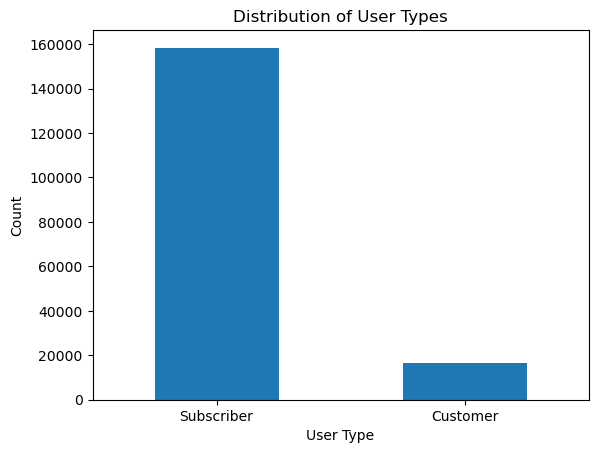

In [56]:
#Visual 1, barchart of user_type

df_analysis['user_type'].value_counts().plot(kind='bar')
# Add titles and labels
plt.title('Distribution of User Types')
plt.xlabel('User Type')
plt.xticks(rotation=360)
plt.ylabel('Count')

plt.show()



In [57]:
# Summing the values of 'Subscriber' and 'Customer"
total_customers = df_analysis['user_type'].value_counts().sum()

# "subsriber" sum
total_subscribers = df_analysis['user_type'].value_counts().get('Subscriber', 0)
percentage_subscribers = (total_subscribers / total_customers) * 100

# total user subscribed
print("The total users that are subscribed to  the total users of the service are:",percentage_subscribers,"%")

The total users that are subscribed to  the total users of the service are: 90.53111710640633 %


## Observation

>We conclude that the majority of the customers of the Ford GoBike System are subscribers.


## What is the trip distance of most of the trips ?

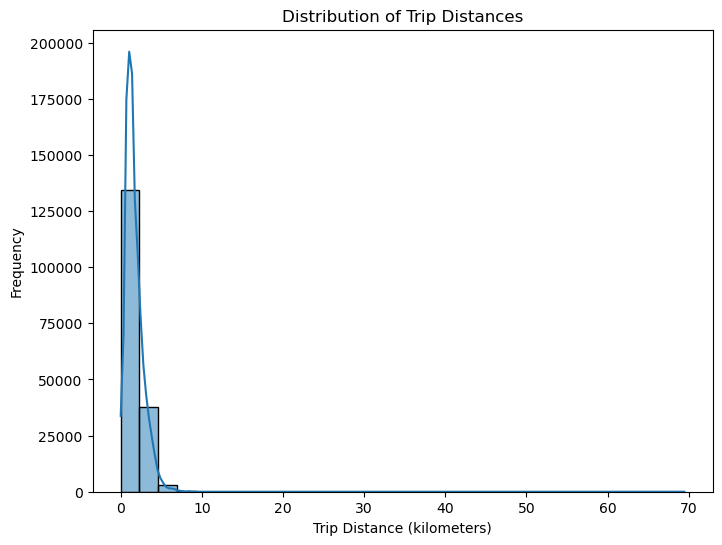

In [58]:
#Visual 2, histplot of distribution of trip distances
# Calculate distance using latitude and longitude
 # Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
    # Earth's radius in kilometers (average radius)
    km = 6370 * c
    return km


# Calculate trip_distance_km` 
df_analysis['trip_distance_km'] = df_analysis.apply(lambda x: haversine(x['start_station_latitude'], x['start_station_longitude'], x['end_station_latitude'], x['end_station_longitude']), axis=1)


# Calculate trip_distance_km` 
plt.figure(figsize=(8, 6))
#create histplot
sns.histplot(df_analysis['trip_distance_km'], bins=30, kde=True)

plt.title('Distribution of Trip Distances')
plt.xlabel('Trip Distance (kilometers)')
plt.ylabel('Frequency')
plt.show()


## Observation

>Users of  the service typically have consistent trip durations.

## Is there a significant difference in trip duration?

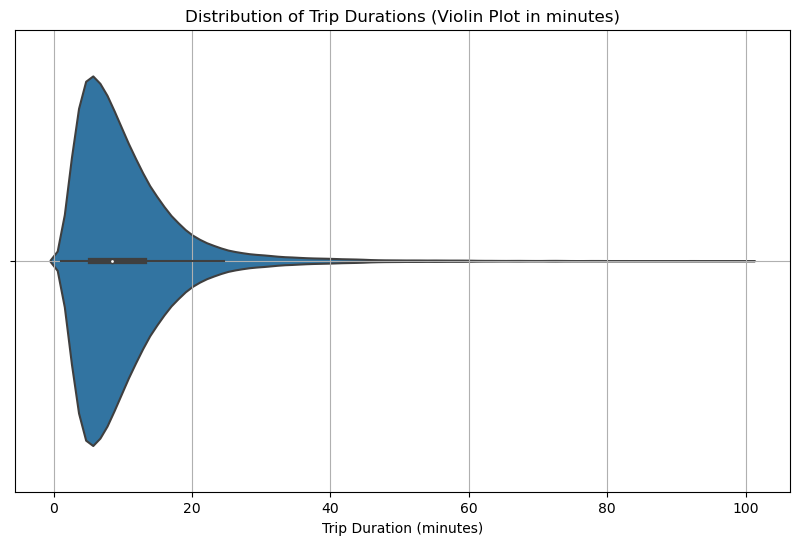

In [59]:
#Visual 3, Violin Plot of Trip Durations
# Convert trip durations from seconds to minutes

df_analysis['duration_min'] = df_analysis['duration_sec'] / 60

plt.figure(figsize=(10, 6))
#the data is heavliy skwed so we need to consider the range of less than 100 minutes
#create violine plot
sns.violinplot(data=df_analysis[df_analysis['duration_min'] < 100], x='duration_min')

plt.title('Distribution of Trip Durations (Violin Plot in minutes)')
plt.xlabel('Trip Duration (minutes)')
plt.grid(True)
plt.show()


## Observation

> The time duration is heavily skwed 

>Trips time is condenced for under 20 minutes trips




## What is the age distribution of users?

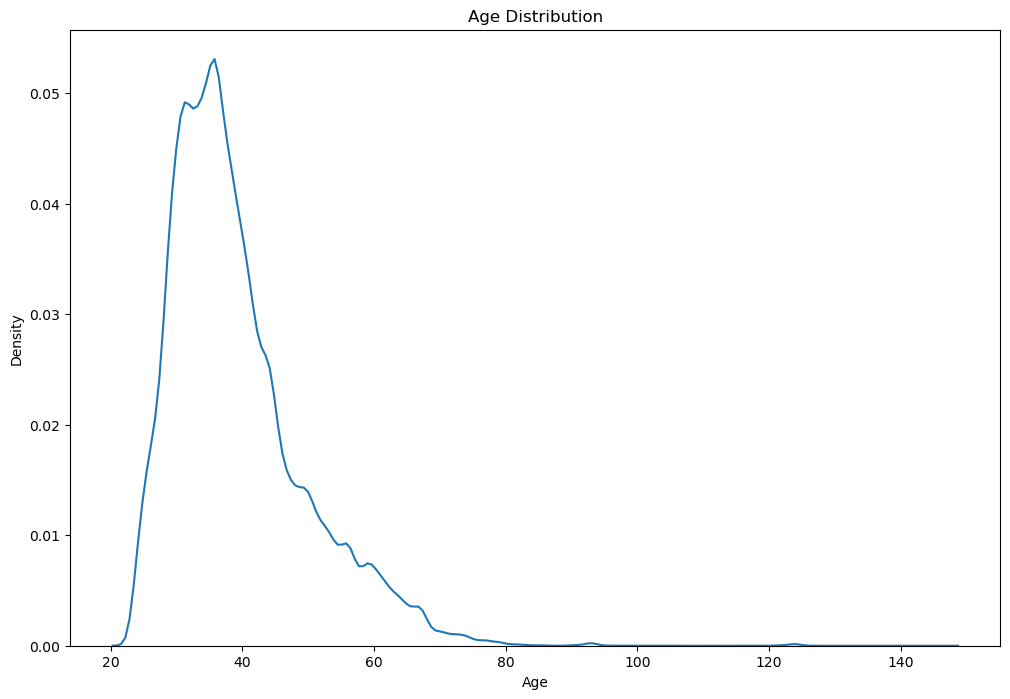

In [60]:
#Visual 4, Kernel Density Estimation of members age
# Calculate age in current year 
plt.figure(figsize=(12, 8))
#crate Kernel Density Estimation plot
sns.kdeplot(data=df_analysis, x="member_age")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()



## Observation

>The plot shows a clear peak around the age range of 30 to 40 years. This indicates that the majority of users are in their 30s


>Most users are between the ages of 20 and 60 years old



## How frequently are bikes shared across all trips?

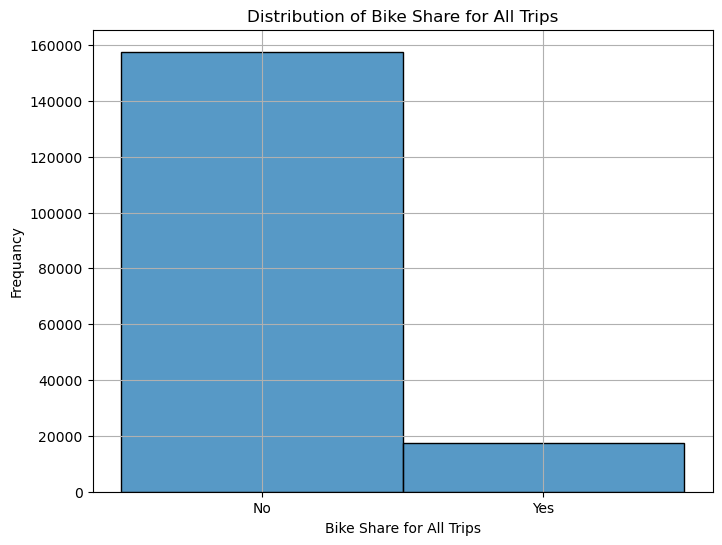

In [61]:
#Visual 5, hitogram of plot of total bike share for trips
plt.figure(figsize=(8, 6))
sns.histplot(x='bike_share_for_all_trip', data=df_analysis)

plt.title('Distribution of Bike Share for All Trips')
plt.xlabel('Bike Share for All Trips')
plt.ylabel('Frequancy')
plt.grid(True)
plt.show()


## Observation

>The number of shared trips is significantly lower than the number of non-shared trips


## What is the most common day of the week for bike trips in the Ford GoBike system?

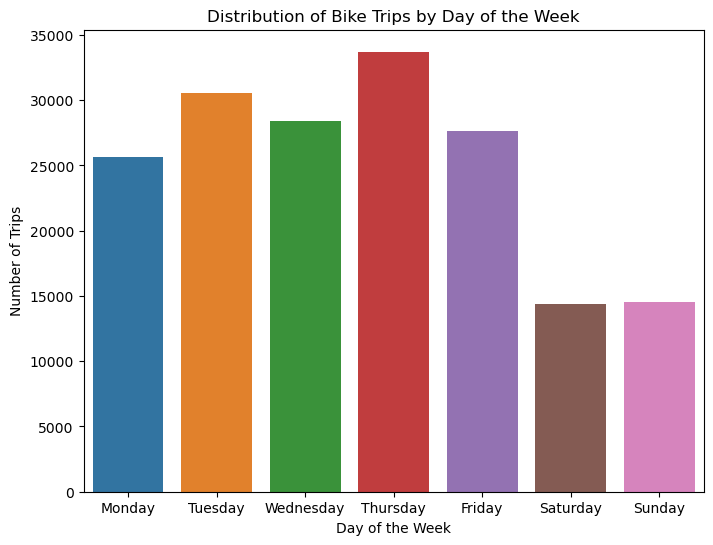

In [62]:
#Visual 6, bar plot to visualize the distribution of bike trips by day of the week

#Extract start_time in days
df_analysis['day_of_week'] = df_analysis['start_time'].dt.day_name()

#crate countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df_analysis, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.title('Distribution of Bike Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.show()

## Observation

>Majority of bike trips occur during weekdays

>Thursday has the highest number of trips

>There is a noticeable drop in the number of trips during the weekend


## What is the distribution of  user gender?

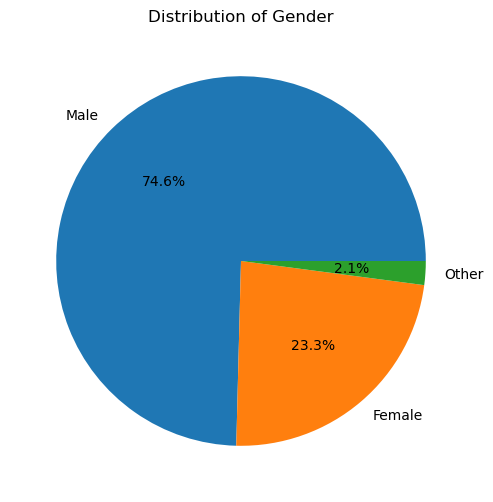

In [63]:
#Visual 7, pie chart of distribution of genders

gender_distribution = df_analysis['member_gender'].value_counts()
#create piechart
plt.figure(figsize=(8, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%')
plt.title('Distribution of Gender')
plt.show()



## Observation

>Males represent the majority of the users

>Females make up one-third of the total male users 

## Observation

>Customers do not have any shared trips

>Subscribers do not show a strong preference for shared trips.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>The variables of interest were the duration of service usage, the positions of stations, the age segments of users, and whether they were Subscribers or Customers

>The **histogram** reveals a significant difference in the distribution of user types.

> in **violine plot**, the data is heavily skwed suggetsing a pattern
>In the **Kernel Density plot**, the kernel density showed a huge spike in age segments in the beginning of the 20

>The **waffle plot** shows a high demand for the service at certain stations

> The **bar plot** shows a significant variation in the number of trips between weekdays and weekends


### Unusual Points were found in several plots

>The **histogram** reveals that Subscribers make up 90% of the total users of the service

>The **scatter plot** shows outliezrs as the trip duration increases


### Transformations

>The date of birth was converted to age based on the current year (2024)

>The start and end times were transformed into datetime variables

>The trip duration was converted to minutes to better visualize the data

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The trip duration distribution was heavily skewed, with a small number of trips lasting 

>The age distribution had a large spike in the early 20s, indicating that the service is particularly popular among younger users. However, there were also some unrealistic age values, likely due to data entry errors, such as ages over 100

>**Age transformation**: date of birth data was converted to age using the current year (2024). This transformation made it easier to analyze and visualize the age distribution of user

>**Time Data Transformation**: The start and end times were converted into datetime variables. This transformation allowed for more accurate time-based analyses, such as examining patterns in trip durations and understanding usage trends throughout the day or across different days of the week

## Bivariate Exploration


## How does the likelihood of sharing a bike differ between Subscribers and Customers?

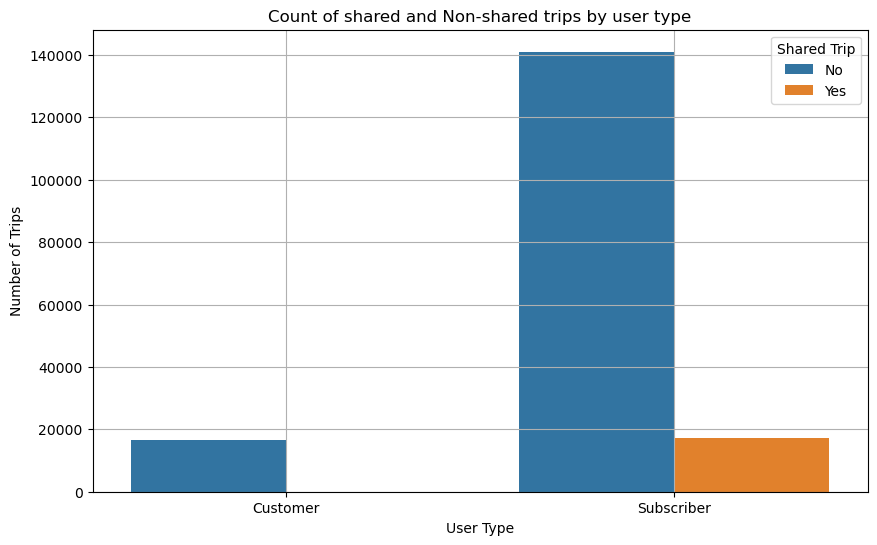

In [64]:
#Visual 8, count plot of Shared trips by user typ
plt.figure(figsize=(10, 6))
#creat countplot
sns.countplot(x='user_type', hue='bike_share_for_all_trip', data=df_analysis)

plt.title('Count of shared and Non-shared trips by user type')
plt.xlabel('User Type')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.legend(title='Shared Trip')
plt.show()


## How does the distribution of trip durations vary across different days of the week, and how do these distributions differ between Subscribers and Customers?




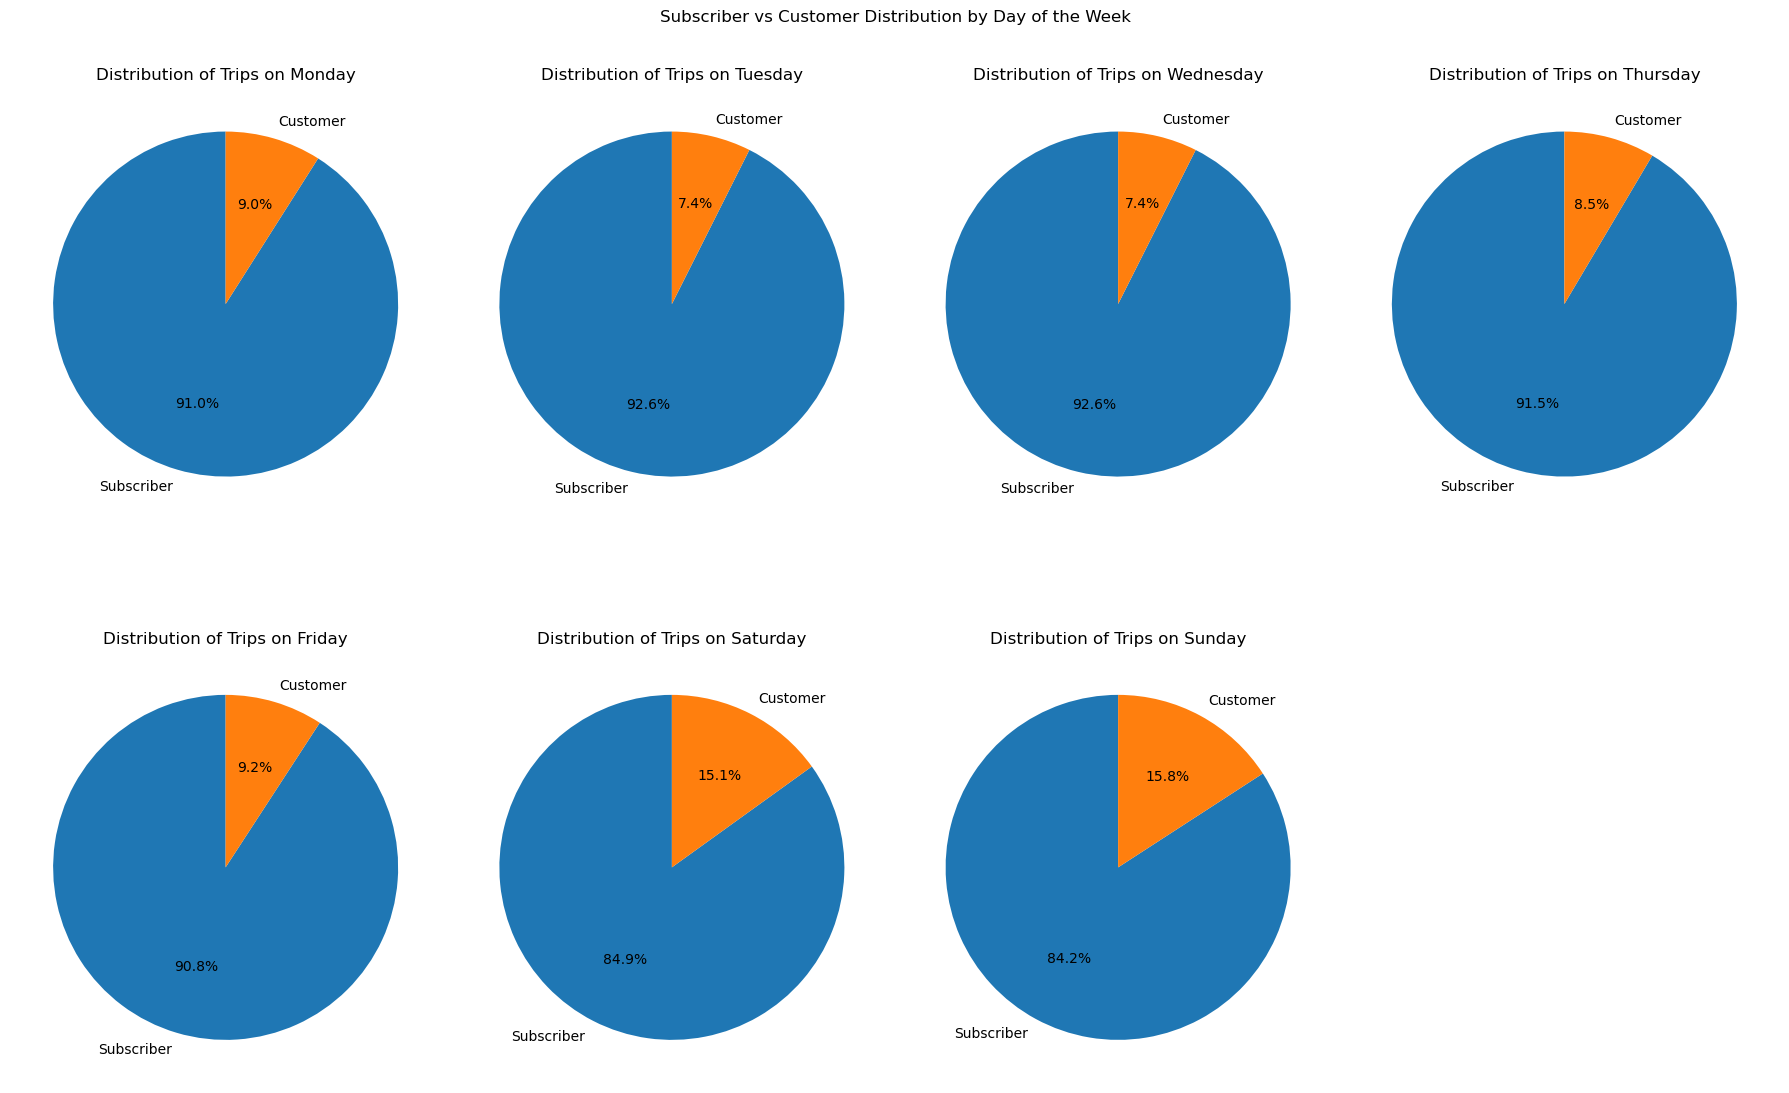

In [65]:
#Visual 9, pie chart of subscriber vs customer distribution by day of the Week
# Create subplots to show pie chart for each day of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#create piechart
fig, axes = plt.subplots(2, 4, figsize=(18, 12))

# Flatten the axes
axes = axes.flatten()

#Plotting
for i, day in enumerate(days):
    ax = axes[i]  # Put values in pie chart
    data = df_analysis[df_analysis['day_of_week'] == day]['user_type'].value_counts()
    ax.pie(data, labels=data.index, autopct='%1.1f%%',startangle=90)
    ax.set_title(f'Distribution of Trips on {day}')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.suptitle('Subscriber vs Customer Distribution by Day of the Week')
plt.show()

## Observation

>Weekends have more customer trip activity than weekdays

>Weekdays are characterized by consistent Subscriber usage

## Is there a significant difference in trip distance and duration?

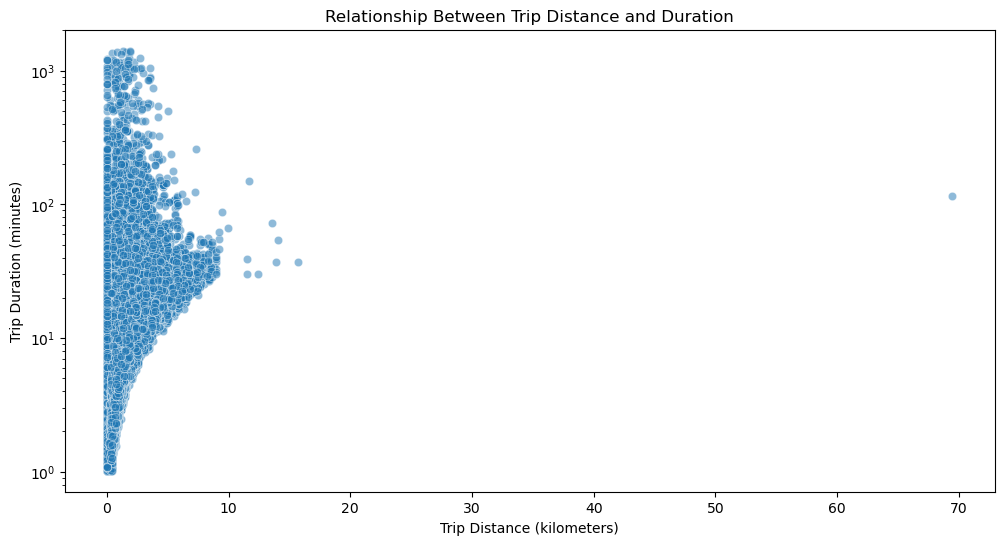

In [66]:
#Visual 10, scatterplot of trip Distance and duration
plt.figure(figsize=(12, 6))
# alpha to check over overlapping points
#create scatterplot
sns.scatterplot(x='trip_distance_km', y='duration_min', data=df_analysis, alpha=0.5)

plt.title('Relationship Between Trip Distance and Duration')
plt.xlabel('Trip Distance (kilometers)')
plt.ylabel('Trip Duration (minutes)')

# Set y-axis to log scale for better visualization
plt.yscale('log')
plt.show()

## Observation

> There is a positive relationship between trip distance and duration

>The relationship between trip distance and duration forms a bell-shaped distribution, with most trips clustered at shorter distances and durations



## How does the number of long trips  vary within each hour of the day?

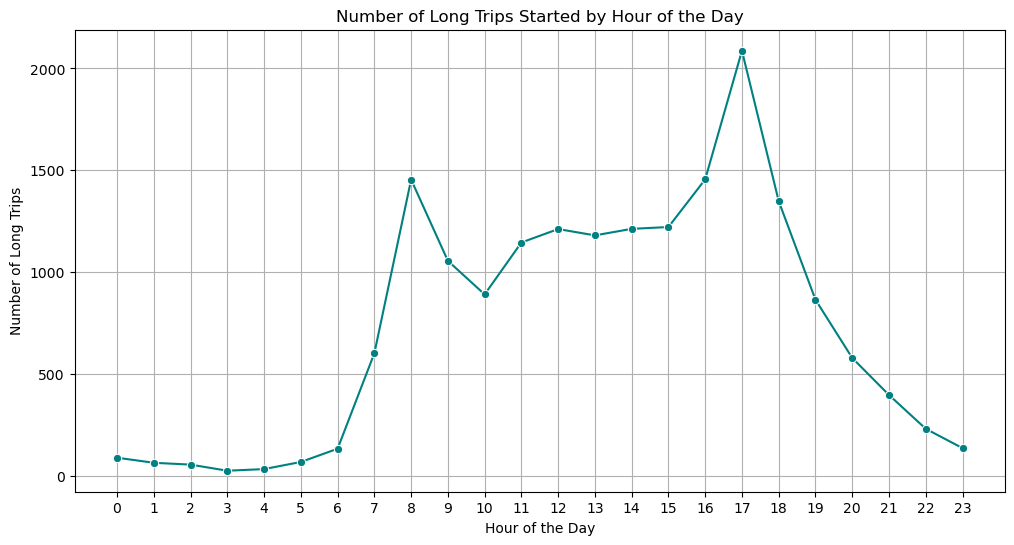

In [67]:
# Visual 11, lineplot of Number of Long Trips Started by Hour of the Day
#convert data to hour
df_analysis['hour_of_day'] = df_analysis['start_time'].dt.hour
#create a threshold to have better visulazation
threshold = df_analysis['duration_min'].quantile(0.90)

long_trips = df_analysis[df_analysis['duration_min'] >= threshold]

# Group by hour of the day to count the number of long trips
hourly_long_trips = long_trips.groupby('hour_of_day').size().reset_index(name='num_long_trips')
plt.figure(figsize=(12, 6))
#create lineplot
sns.lineplot(x='hour_of_day', y='num_long_trips', data=hourly_long_trips, marker='o', color='teal')

plt.title('Number of Long Trips Started by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Long Trips')
plt.xticks(range(0, 24))  # Show every hour on the x-axis
plt.grid(True)
plt.show()

## Observation

> There is high activity in morning hour 6-8AM and also a higher one in 15-17PM usage of the service

>Midnight has low number of long trips 




## Do trip durations differ  between genders?

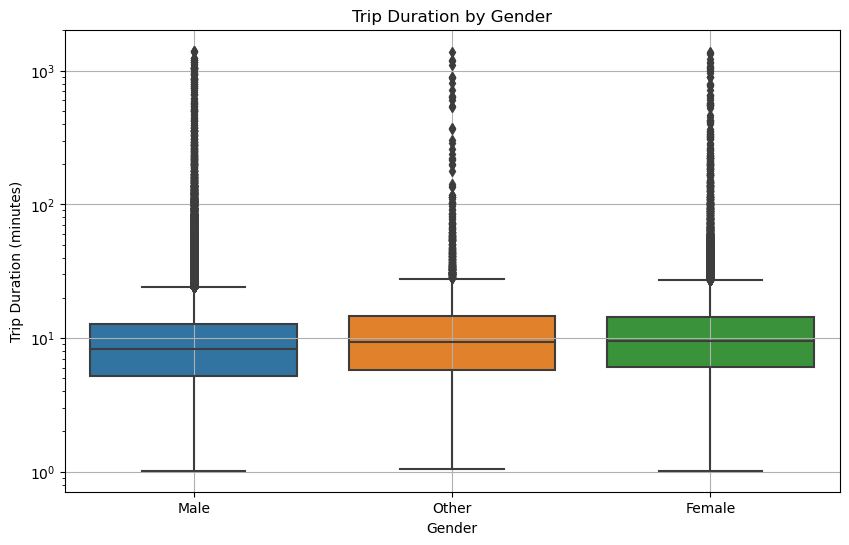

In [19]:
#Visual 12, Box plot of trip Duration in minutes
plt.figure(figsize=(10, 6))
#create boxplot
sns.boxplot(x='member_gender', y='duration_min', data=df_analysis)
plt.title('Trip Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Trip Duration (minutes)')
# log scale helps to better visualize 
plt.yscale('log')  
plt.grid(True)
plt.show()

## Observation

>The median trip durations are for male, female, and other gender categories are quite similar

## How does the average trip duration vary between Subscribers and Customers on weekdays versus weekends?

(array([0, 1]), [Text(0, 0, 'Customer'), Text(1, 0, 'Subscriber')])

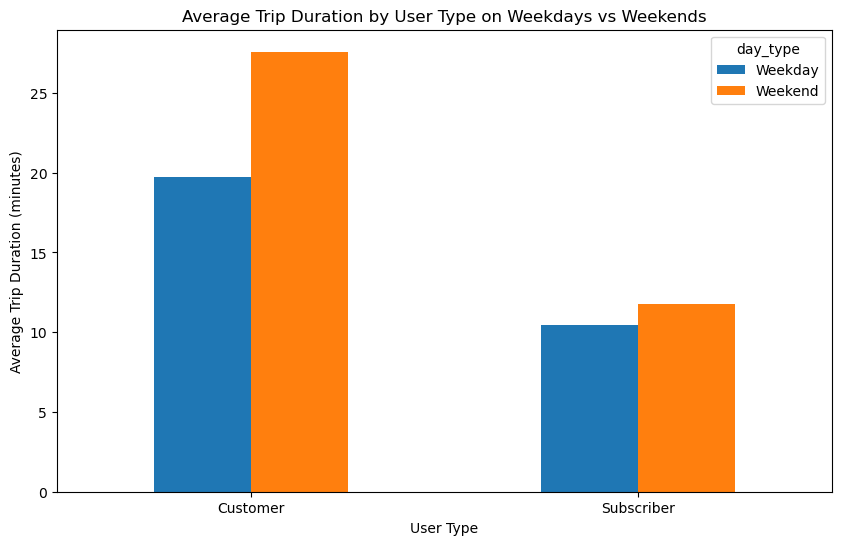

In [72]:
# Visual 13, clustered bar chart of average trip duration by User Type on Weekdays verses Weekends

df_analysis['day_of_week'] = df_analysis['start_time'].dt.day_name()
#Loop arount week days to determin which is weekends
df_analysis['day_type'] = df_analysis['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
# Group by user type and day type to calculate the average trip duration
avg_duration = df_analysis.groupby(['user_type', 'day_type'])['duration_min'].mean().unstack()

# Create  clustered bar chart
avg_duration.plot(kind='bar', figsize=(10, 6))
# labels
plt.title('Average Trip Duration by User Type on Weekdays vs Weekends')
plt.xlabel('User Type')
plt.ylabel('Average Trip Duration (minutes)')
plt.xticks(rotation=0)


## Observation

>The avarage trip duration of customers in weekends is higher compared to week days

>The avarage customers trips is have overall  higher duration than Subscribers

## How does the distribution of subscribers and customers vary across different genders in the GoBike system?

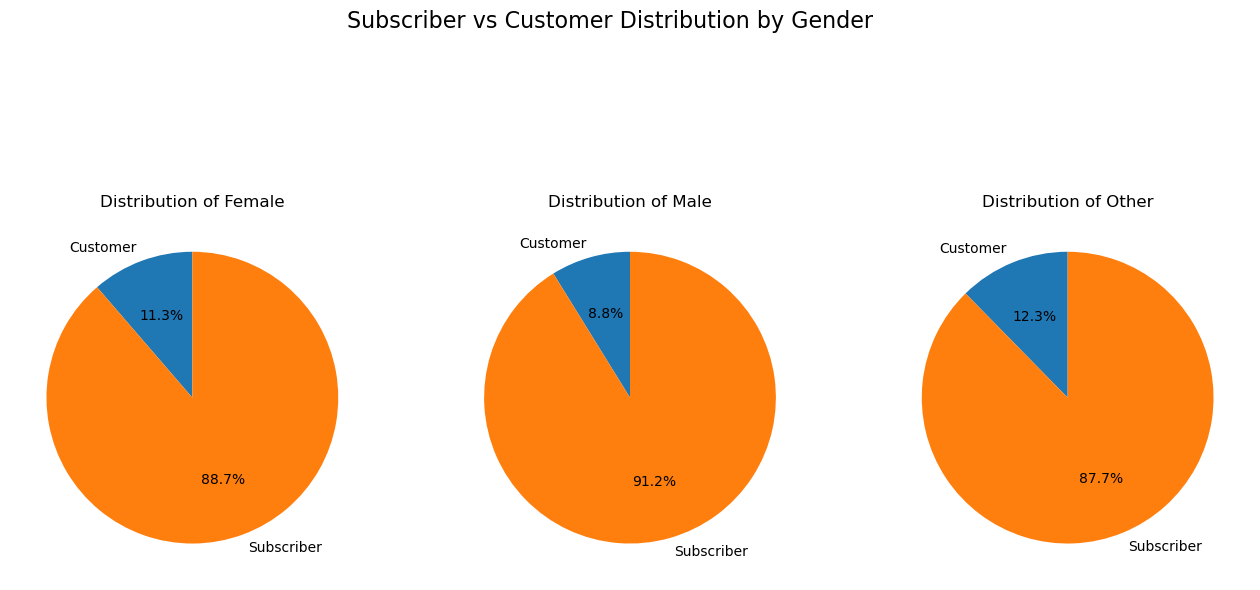

In [73]:
#Visual 14, Pie chart of distribution of gender by user type

#  Create a crosstab to see the distribution of gender by user type
gender_user_distribution = pd.crosstab(df_analysis['member_gender'], df_analysis['user_type'])

#Create pie charts
plt.figure(figsize=(16, 8))

# Loop each gender to create a pie chart
for i, gender in enumerate(gender_user_distribution.index):
    plt.subplot(1, len(gender_user_distribution.index), i + 1)  # Create a subplot for each gender
    plt.pie(gender_user_distribution.loc[gender], labels=gender_user_distribution.columns, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {gender}')

plt.suptitle('Subscriber vs Customer Distribution by Gender', fontsize=16)
plt.show()


## Observation

>Subscribers are dominate in each gender segment


## What is the different distribution of age  across different user types?

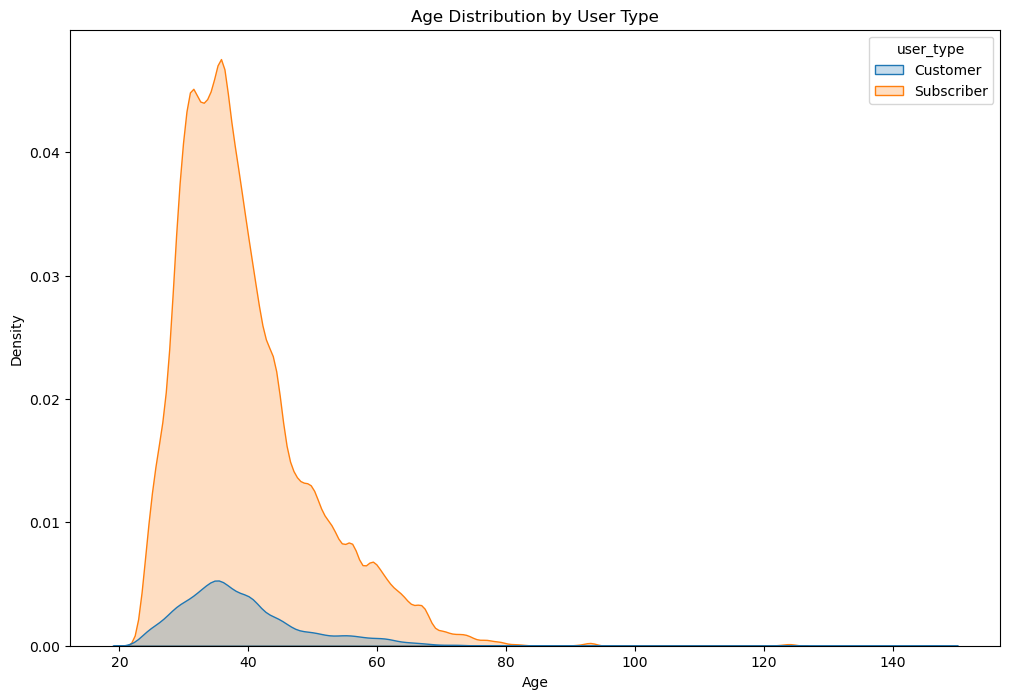

In [74]:
#Visual 15,  Kernel Density Estimation plot of age distribution with respect of user type

plt.figure(figsize=(12, 8))
# Create a Kernel Density Estimation plot with user type comparison
#use fil to see each user type
sns.kdeplot(data=df_analysis, x="member_age", hue="user_type", fill=True)
plt.title('Age Distribution by User Type')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

## Observation

>There is a noticeably lower density of customers across all age groups, indicating that there are fewer people  to use the service as customers

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>In the **scatter plot**, most users fall within a central range, indicating a bell-shaped distribution.

>In the **box plot**, all genders usully has same duration of trips

>The **pie chart** shows that Customers have more usage of the service in week ends 

>**Line plot** shows the activity of the service increase before and after workhours

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Before and after working hours there is high activity of users that use the service

>Customers do not shared trip service at all

>Customers activity increase during weekends 

>Males are majority of users


## Multivariate Exploration



## How does trip distance differ with trip duration, and how does this relationship vary by user type?

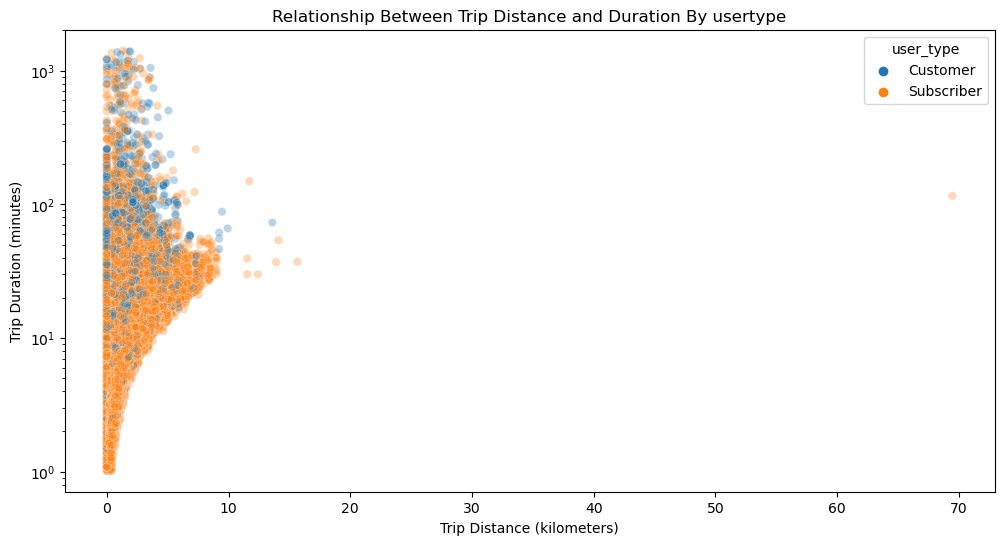

In [48]:
#Visual 16, scatterplot of trip distance and duration by user type


plt.figure(figsize=(12, 6))
# alpha to check over overlapping points
#create scatterplot
sns.scatterplot(x='trip_distance_km', y='duration_min',hue="user_type", data=df_analysis, alpha=0.3)

plt.title('Relationship Between Trip Distance and Duration By usertype')
plt.xlabel('Trip Distance (kilometers)')
plt.ylabel('Trip Duration (minutes)')

# Set y-axis to log scale for better visualization
plt.yscale('log')
plt.show()



## Observation


>Subscribers and Customers exhibit similar usage patterns in terms of trip duration and distance, particularly for shorter trips however, as trip distances increase, the behavior of Subscribers tends to diverge from that of Customers

>Both Subscribers and Customers usually do not exceed 8 kilometers in their trips with long trips being  rare

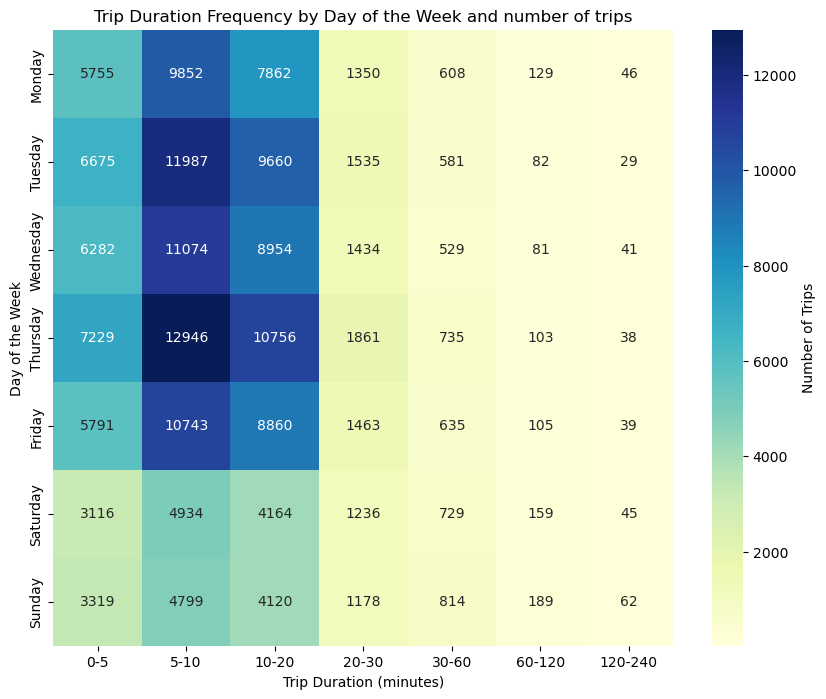

In [27]:
#Visual 17, heatmap of Trip Duration Frequency by Day of the Week and number of trips
#create bins to recoginze time patterns to have better visulazation  
df_analysis['duration_bins'] = pd.cut(df_analysis['duration_min'], bins=[0, 5, 10, 20, 30, 60, 120, 240], labels=['0-5', '5-10', '10-20', '20-30', '30-60', '60-120', '120-240'])

# Create a crosstab of day of the week and duration bins
crosstab = pd.crosstab(df_analysis['day_of_week'], df_analysis['duration_bins'])

# Sort the days in order
crosstab = crosstab.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# Create heatmap
plt.figure(figsize=(10, 8))
# annot is write result and fmt is the number format
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Number of Trips'})
plt.title('Trip Duration Frequency by Day of the Week and number of trips')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Day of the Week')
plt.show()


## Observation

>majority of trips across all days of the week fall within the 5-10 minute and 0-5 minute duration ranges

>Thursday have the highest number of trips in the 5-10 minute range

>Few trips exeeds 120 across all week

## How does trip distance vary with trip duration, and how does this relationship differ between Subscribers and Customers?

D:\fdhdg\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


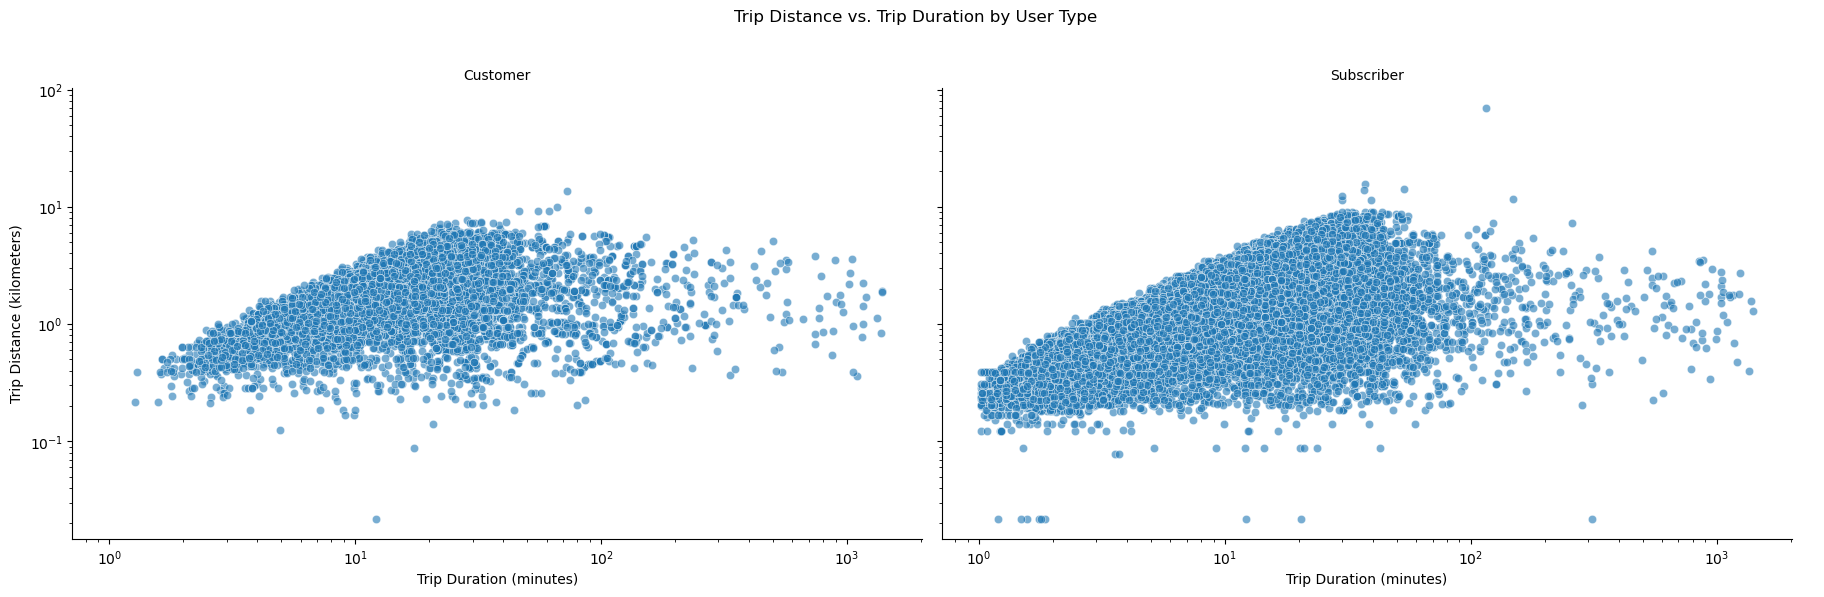

In [23]:
#Visual 18, facetgrid of Trip Distance vs Trip Duration by User Type
#edit shape 
g = sns.FacetGrid(df_analysis, col='user_type', height=6, aspect=1.5)

# map the scatter plot to the facetgrid
g.map(sns.scatterplot, 'duration_min', 'trip_distance_km', alpha=0.6)
g.set_axis_labels('Trip Duration (minutes)', 'Trip Distance (kilometers)')
g.set_titles('{col_name}')
g.set(xscale='log', yscale='log')  # Apply log scale to both axes
g.add_legend()

# create and display the plot
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Trip Distance vs Trip Duration by User Type')
plt.show()

## Observation

>Subscribers tend to use the service for shorter durations and distances

>Customers exhibit a broader range of trip durations and distances

## How does the number of long trips vary throughout the day between users ?

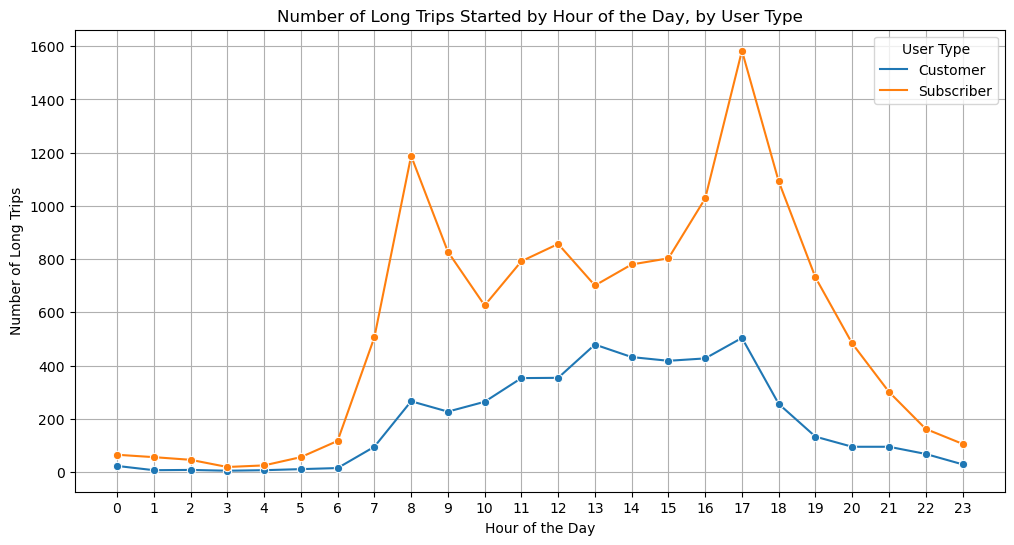

In [77]:
#Visual 19, line plot of number of long trips in each hour of the day by user type

# Create a threshold to filter long trips top 10% by duration
threshold = df_analysis['duration_min'].quantile(0.90)
long_trips = df_analysis[df_analysis['duration_min'] >= threshold]

# Group by hour of the day and user type to count the number of long trips
hourly_long_trips_by_user_type = long_trips.groupby(['hour_of_day', 'user_type']).size().reset_index(name='num_long_trips')

# Create a line plot with separate lines for each user type
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour_of_day', y='num_long_trips', hue='user_type', data=hourly_long_trips_by_user_type, marker='o')

plt.title('Number of Long Trips Started by Hour of the Day, by User Type')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Long Trips')
plt.xticks(range(0, 24))  # Show every hour on the x-axis
plt.grid(True)
plt.legend(title='User Type')
plt.show()

## Observation

>Subscribers tend to take more long trips than Customers, especially during peak commuting hours

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Users trips falles between 0-10 minutes interval 

>Subscribers have steady trip distances, unlike Customers, who show a high variation in trip distances

### Were there any interesting or surprising interactions between features?

> Thursday was the highst day of numebr of trips

>Trip durations are relatively similar across all genders, suggesting that usage patterns do not differ significantly by gender

## Conclusions
>The dataset provides insights into user behavior in the GoBike System across different demographics and user types. Subscribers are the only users who utilize shared bike rides, suggesting that this service may be exclusive to them or that Customers do not prefer it. Additionally, different time segments revealed patterns in user behavior within the GoBike System.